# Submitter Details




Full Name : Balaji Gurusala

Email : balaji.gsb@gmail.com

Project Name: Lending Club Loan Approval System

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

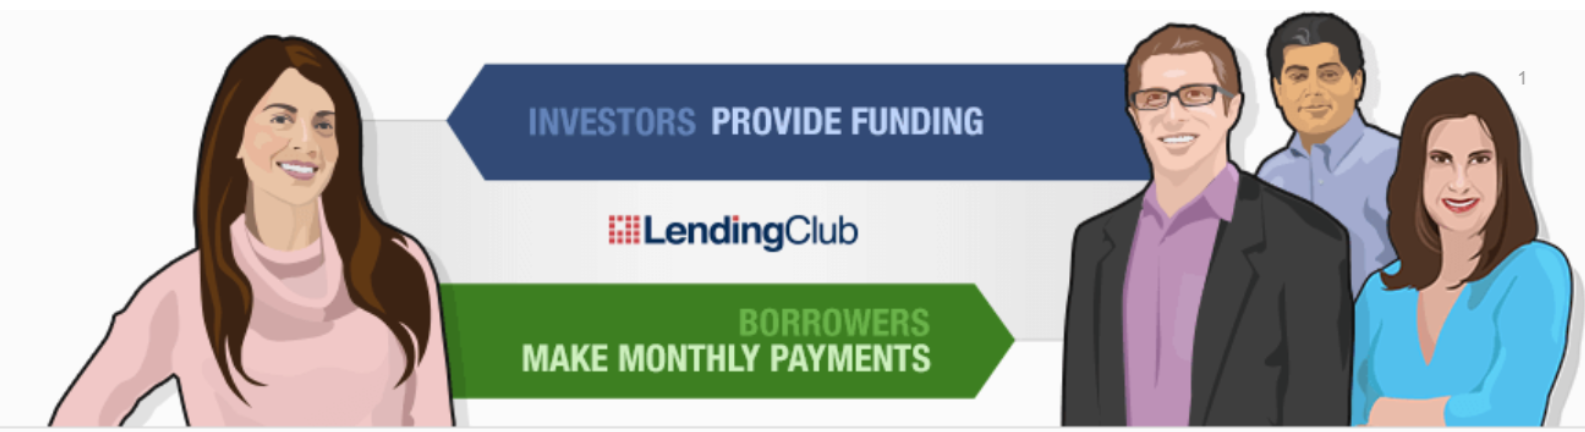

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

# EDA and Feature Engineering

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
## Load the dataset
from google.colab import files

lc_dataset = files.upload()

Saving loans.csv to loans.csv


In [4]:
## Read the uploaded lending club CSV input file
lc_df = pd.read_csv('loans.csv')

In [5]:
## Observe the first few rows
## Do you observe any issues?
lc_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [6]:
## Check the dataframe structure - datatypes and number of non-null rows
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [7]:
## Check the shape
lc_df.shape

(38770, 23)

In [8]:
## Check the missing values across the columns
lc_df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

- Number of Entries: There are 38770 rows and 23 columns

- Data Types: The Dataset consists of:
  *   1 Columns of type int64 (integer)
  *   12 Columns of type float64 (float)
  *   10 Columns of type object (strings)

- Non-Null Counts:
  * All columns have 38770 non-null entires except emp_length and revol_util columns
  * revol_util column has 38720 non-null entires, indicating around 50 entries missing values
  * emp_length columns 37734 non-null entires, indicating around 986 missing values in entries

- Column Details:
  * id, member_id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, purpose, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, last_pymnt_amnt, loan_status are the 23 columns in the datasheet
  * id column is the only integer (one column)
  * member_id, loan_amt, installment, annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, total_acc, last_pymnt_amnt are the columns of type float (12 columns)
  * term, int_rate, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, revol_util, loan_status columns are of type object(strings) (10 columns)




### Data Cleaning

- Perform missing value treatment
- Remove months suffix from term column
- Remove '%' symbol from int_rate & revol_util columns
- emp_length column has '<' & '+' Symbols.


In [9]:
#Before imputation
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [10]:
#Check the revol_util spread
lc_df['revol_util'].value_counts().head(20).sort_values(ascending=True)

,count
revol_util,
25.5%,53
65.9%,53
46.6%,54
75.5%,54
32%,54
64.8%,54
64.6%,54
37.6%,55
66.6%,55


# Observation on revol_util column
  * Around 960 entries have 0% revolving utilizing rate idicating most number of people have zero revolving utilization. mode can be used to the fill the null entries


In [11]:
## For the column revol_util, only 70 entries are missing values. This shows we can leverage existing data to fill the gaps (Imputation!)
lc_df['revol_util'] = lc_df['revol_util'].fillna(lc_df['revol_util'].mode()[0])

In [12]:
## Check the emp_length column spread
lc_df['emp_length'].value_counts().head(20).sort_values(ascending=True)

,count
emp_length,
9 years,1229
8 years,1444
7 years,1718
6 years,2181
1 year,3183
5 years,3209
4 years,3362
3 years,4026
2 years,4308


In [13]:
## For the column emp_length, 986 entries are missing values. Based on above count data, we can leverage existing data to fill the gaps
lc_df['emp_length'] = lc_df['emp_length'].fillna(lc_df['emp_length'].mode()[0])

In [14]:
## check the data for any other missing values after filling
lc_df.isnull().sum()


,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


In [15]:
#Remove months suffix from term
lc_df['term'] = lc_df['term'].str.replace('months','')

In [16]:
##Removing '%' symbol from int_rate & revol_util and convert to float
lc_df['int_rate'] = lc_df['int_rate'].str.replace('%','').astype(float)
lc_df['revol_util'] = lc_df['revol_util'].str.replace('%','').astype(float)

In [17]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  float64
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           38770 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [18]:
lc_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,Fully Paid


##### Dropping the unnecessary columns

- Check the cardinality of columns
- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [19]:
#Check cardinalty
lc_df.nunique()

,0
id,38770
member_id,38770
loan_amnt,870
term,2
int_rate,371
installment,15091
grade,7
sub_grade,35
emp_length,11
home_ownership,5


- from the above data, both id and member_id are unique, so there are no duplicates in the data

In [20]:
## Drop the id. member_id, installment, & last_pymnt_amnt as they are irrelevant
if 'id' in lc_df.columns and 'member_id' in lc_df.columns and 'installment' in lc_df.columns and 'last_pymnt_amnt' in lc_df.columns:
  lc_df.drop(['id', 'member_id', 'installment', 'last_pymnt_amnt'], axis=1, inplace=True)

In [21]:
## Check the dataframe again
lc_df.shape

(38770, 19)

In [22]:
lc_df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


Perform any additional data preparation steps if needed

# Summary Statistics
The dataset has 38770 rows and 19 columns after cleanup
- loan amount: Average loan amount is 11069, minimum loan amount is 500, median is 9737 and maximum loan amount is 3500
- int. rate: Average interest rate is 11.9%, with a range of 5.4% to 24.59%
- dti: Debt to income ration average is 13.2, with a range of 0 to 29.9%
- deling_2yrs: Number of payments past due beyond 30 days in the last 2 years is in the range of 0 to 11 and avergae is 0.14
- revol_util: Revolving line utlization rate is in the range of 0 to 99.9% with the mean of 48.6%
- term: Only terms are provided (36 & 60 months). 75% of loans are 36 months
- Grade: There are 7 grades (A-F) in which majority (Around 30%)loans are classified as 'B' grade.
- Sub Grade: There are 5 subgrades ( 1- 5)
- Home ownership: Majority of the borrowers are Renting (47%)
- Purpose: debt. consolidation is major reason for appying loan
- Loan status: 33136 out of 38770 are fully paid (85% )which means 15% (5634) loans are default. Goals is to reduce the default rate.

In [23]:
## Describe numerical columns
lc_df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,11069.122388,11.947715,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,48.646399,22.059788
std,7362.292600,3.697871,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,28.398310,11.420556
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5325.000000,8.940000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,25.100000,13.000000
50%,9737.500000,11.780000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,49.100000,20.000000
75%,15000.000000,14.420000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,72.200000,29.000000
max,35000.000000,24.590000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000


In [24]:
## Describe columns of type object
lc_df.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,loan_status
count,38770,38770,38770,38770,38770,38770,38770,38770
unique,2,7,35,11,5,3,14,2
top,36,B,A4,10+ years,RENT,Not Verified,debt_consolidation,Fully Paid
freq,29096,11726,2874,9583,18550,16732,18145,33136


### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

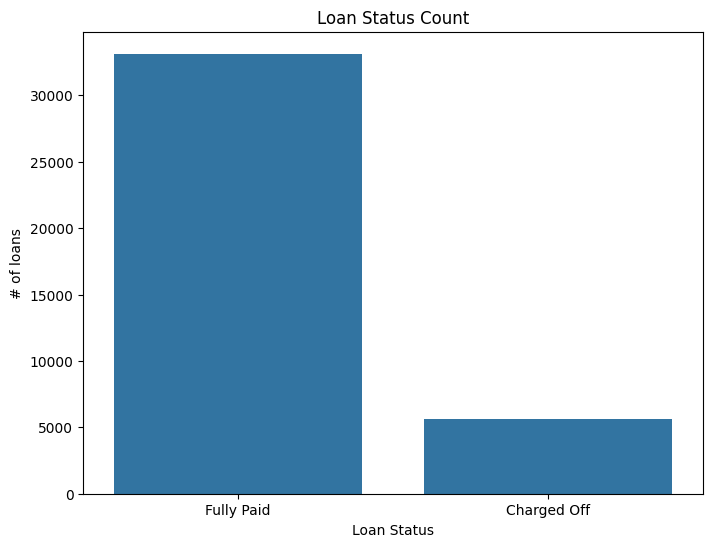

In [25]:
## Count plot for loan_status
plt.figure(figsize=(8, 6))
sns.countplot(data=lc_df, x='loan_status')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('# of loans')
plt.show()

Observations
- 33136 (85%) borrowers fully paid their loan and 5634 (15%) borrowers are defaults
- clearly there is a class imbalance here where majority are fully paid!

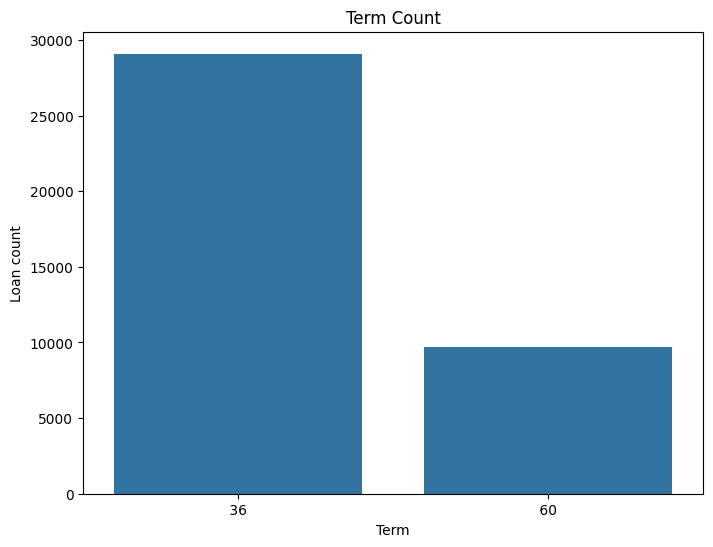

In [26]:
## Count plot for term
plt.figure(figsize=(8, 6))
sns.countplot(data=lc_df, x='term')
plt.title('Term Count')
plt.xlabel('Term')
plt.ylabel('Loan count')
plt.show()

Observations
- Majority (75%, 29096))of the loans are 36 months term


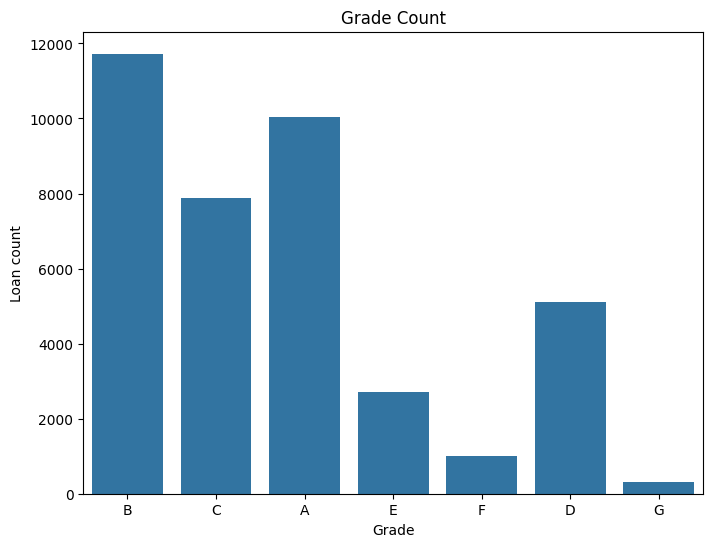

In [27]:
## Count plot for grade
plt.figure(figsize=(8, 6))
sns.countplot(data=lc_df, x='grade')
plt.title('Grade Count')
plt.xlabel('Grade')
plt.ylabel('Loan count')
plt.show()

Observations
- Majority of the loands are graded as B and then A and C follows

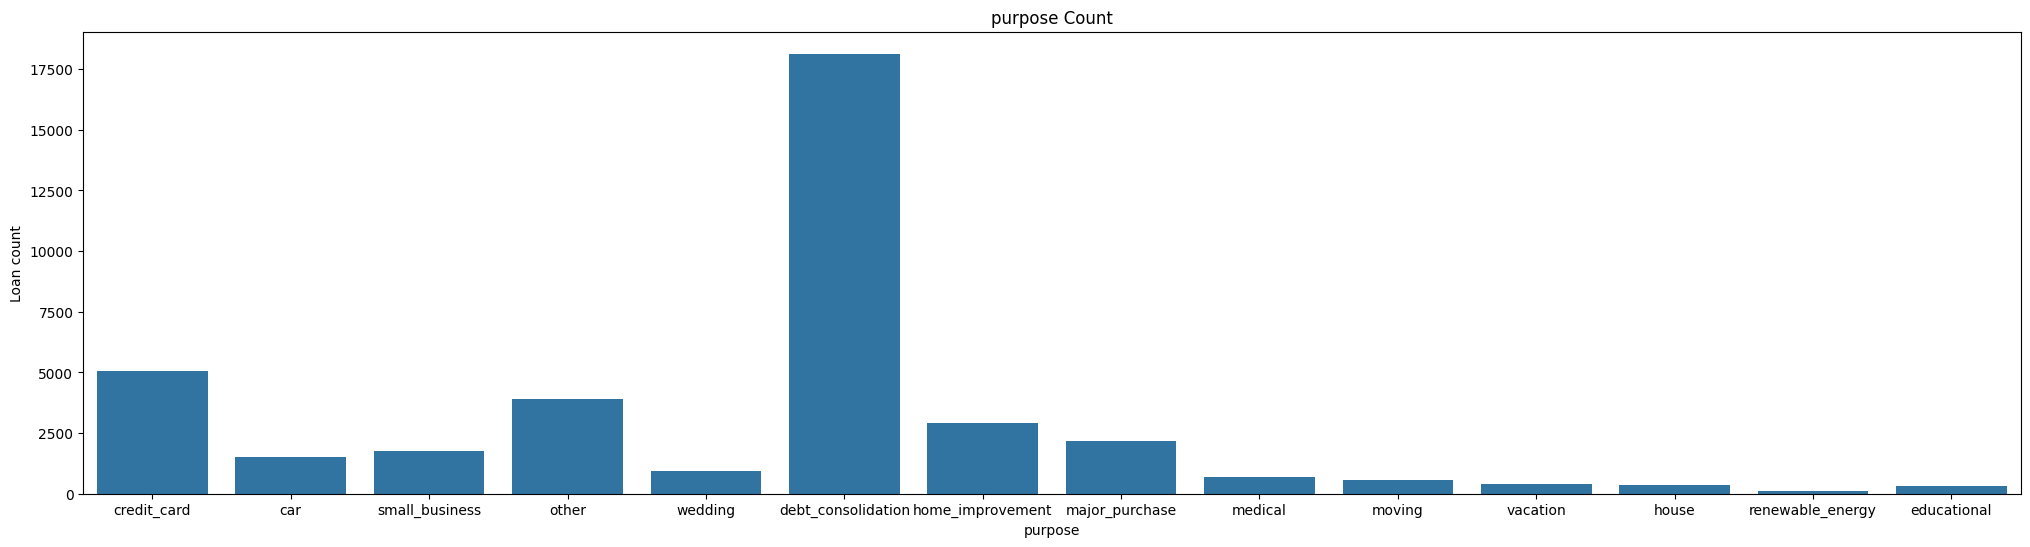

In [28]:
## Count plot for purpose
plt.figure(figsize=(25, 6))
sns.countplot(data=lc_df, x='purpose')
plt.title('purpose Count')
plt.xlabel('purpose')
plt.ylabel('Loan count')
plt.show()

Observations
- debt consolidation is the major reason for the loand and credit card payoff the second major reason but the gap b/n first and second reason is very large.

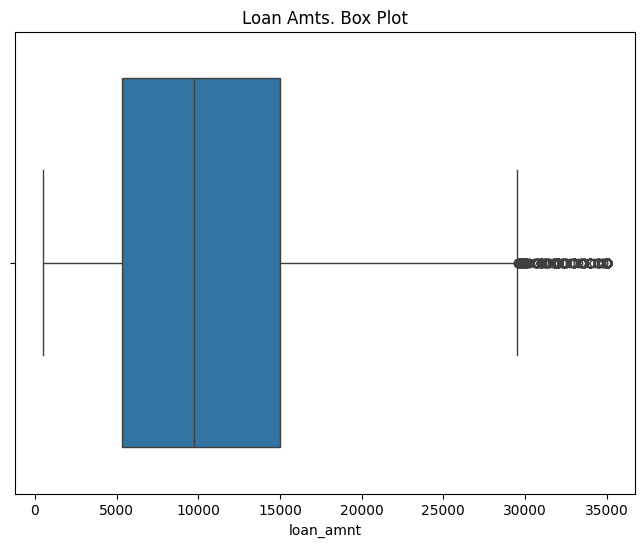

In [29]:
## Box plot for loan amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=lc_df['loan_amnt'])
plt.title('Loan Amts. Box Plot')
plt.show()

<Axes: xlabel='loan_amnt', ylabel='Count'>

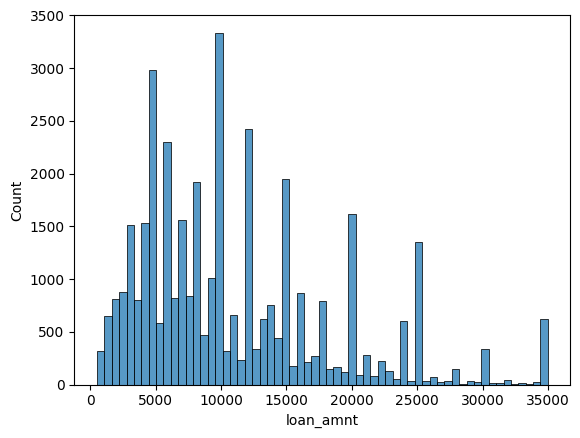

In [30]:
sns.histplot(lc_df['loan_amnt'])

**Observations**

- 25% of loans are around 5K$, 50% of loans are 10K$ and 75% of loans are 15K$

- There are some outliers in the data where loan amounts are above '30K$'

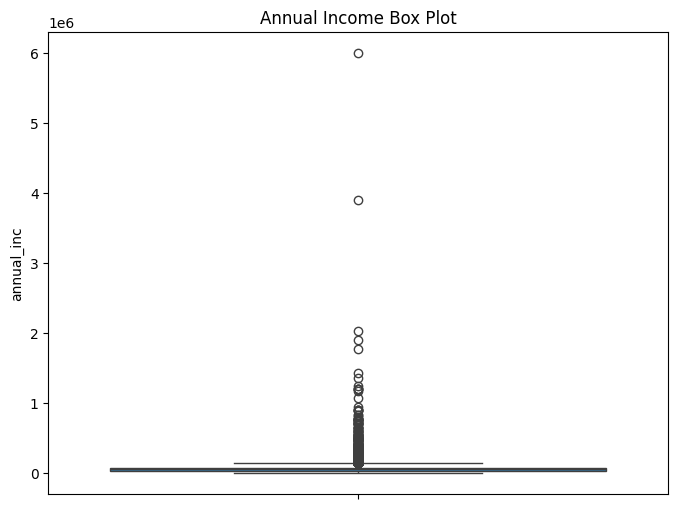

In [31]:
## Box plot for Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(data=lc_df, y='annual_inc')
plt.title('Annual Income Box Plot')
plt.show()

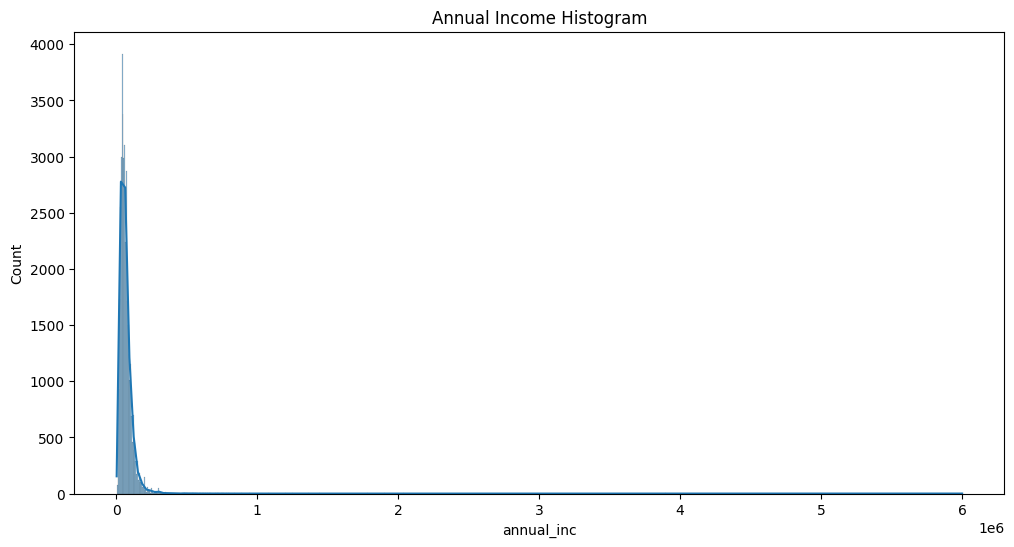

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(lc_df['annual_inc'], bins=1000, kde=True)
plt.title('Annual Income Histogram')
plt.show()

In [33]:
lc_df['annual_inc'].describe()

,annual_inc
count,3.877000e+04
mean,6.880025e+04
std,6.416132e+04
min,4.000000e+03
25%,4.000000e+04
50%,5.892350e+04
75%,8.200000e+04
max,6.000000e+06


In [34]:
lc_df['annual_inc'].quantile(0.9)

115000.0

Observations
- Average annual income is 68K while lowest borrower annual income is 4K and highest borrower income is 6M
- clearly there are outliers in annual income. May need to do capping during feature engineering
- 90% of the borrowers have an annual income of 115K$

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

In [35]:
## map the loan_status as 0s and 1s
lc_df['loan_status'] = lc_df['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1,
    # Add more mappings if necessary
    'Default': 1,  # You can map additional statuses if needed
})

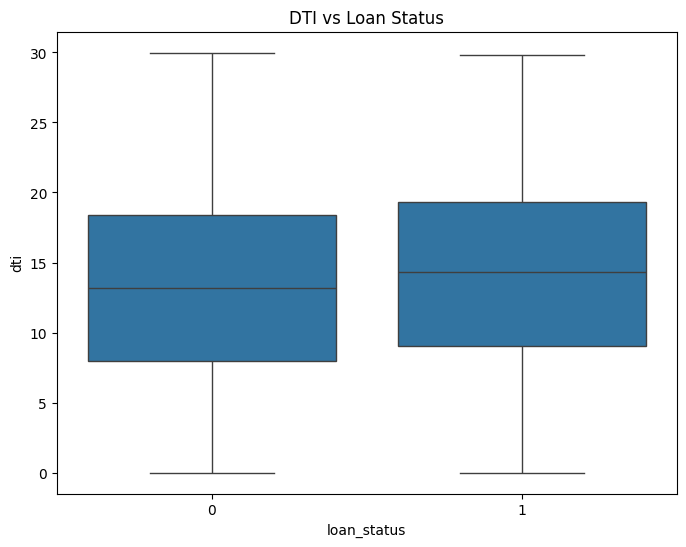

In [36]:
#Plot dti vs loan defaulters to check the correlation
plt.figure(figsize=(8, 6))
sns.boxplot(x=lc_df['loan_status'], y=lc_df['dti'])
plt.title('DTI vs Loan Status')
plt.show()

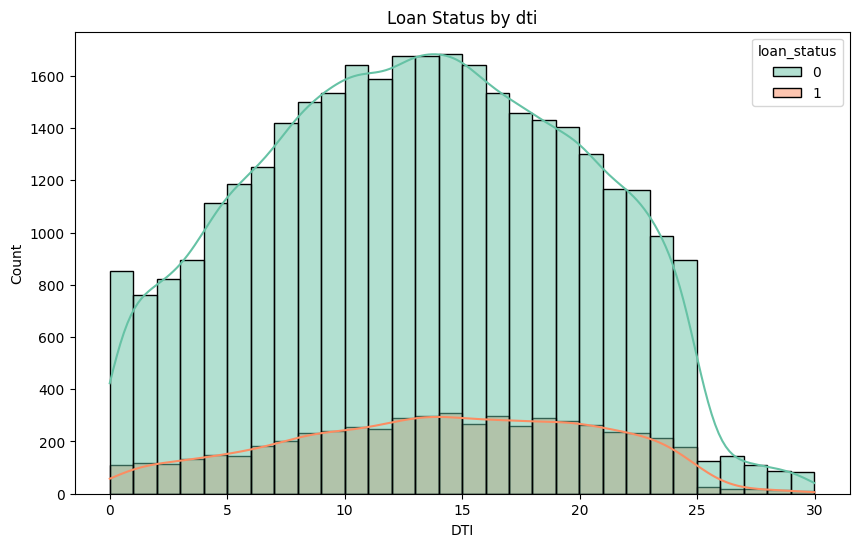

In [37]:
#Loan Grade vs Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=lc_df, x='dti', hue='loan_status', bins=30, kde=True, palette='Set2')

# Add titles and labels
plt.title('Loan Status by dti')
plt.xlabel('DTI')
plt.show()

Observations
- Debt to income ratio does not have negative corelatio to loan defaults or loan pay off's

Text(0, 0.5, 'Loan Default Status')

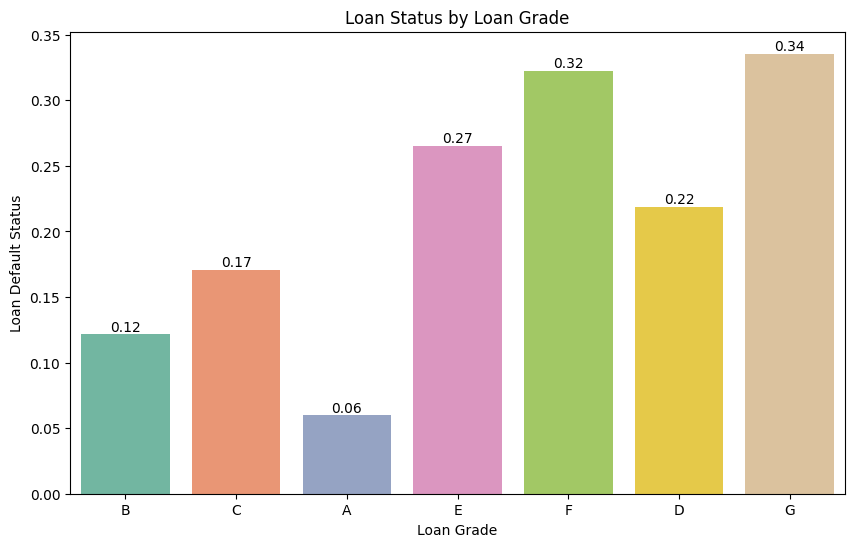

In [38]:
#Loan Grade vs Loan Status
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='grade', y='loan_status', data=lc_df, palette='Set2', ci= None)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Add titles and labels
plt.title('Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Default Status')

In [39]:
avg_default_rate = lc_df['loan_status'].mean()*100
print(avg_default_rate)

14.531854526695898


Loan default rate is higher for the loan grades D, E, F,G. B & C loan grades are close to the average


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

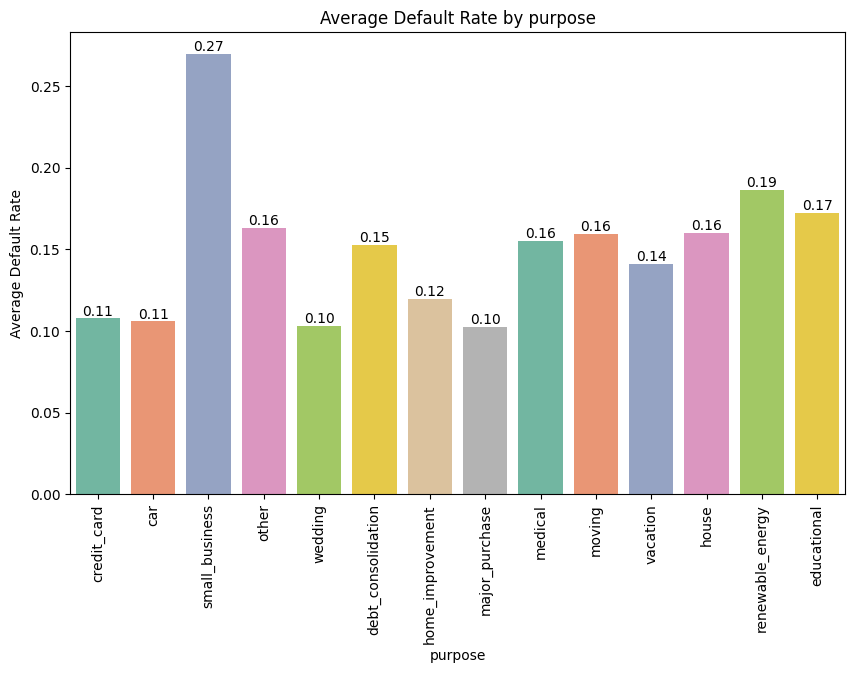

In [40]:
#Default rate for purpose

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='purpose', y='loan_status', data=lc_df, palette='Set2', ci= None)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Add titles and labels
plt.title('Average Default Rate by purpose')
plt.xlabel('purpose')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=90)

Default rate is higher for small business loans, but percenate of borrowers for small business loans is also lower


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '11.0')])

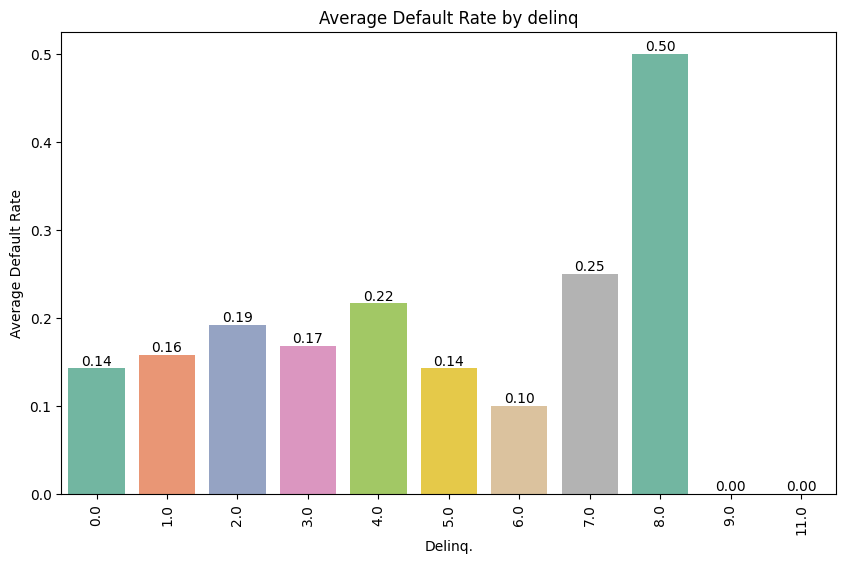

In [41]:
## Default rate based on delinq status
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='delinq_2yrs', y='loan_status', data=lc_df, palette='Set2', ci= None)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Add titles and labels
plt.title('Average Default Rate by delinq')
plt.xlabel('Delinq.')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=90)

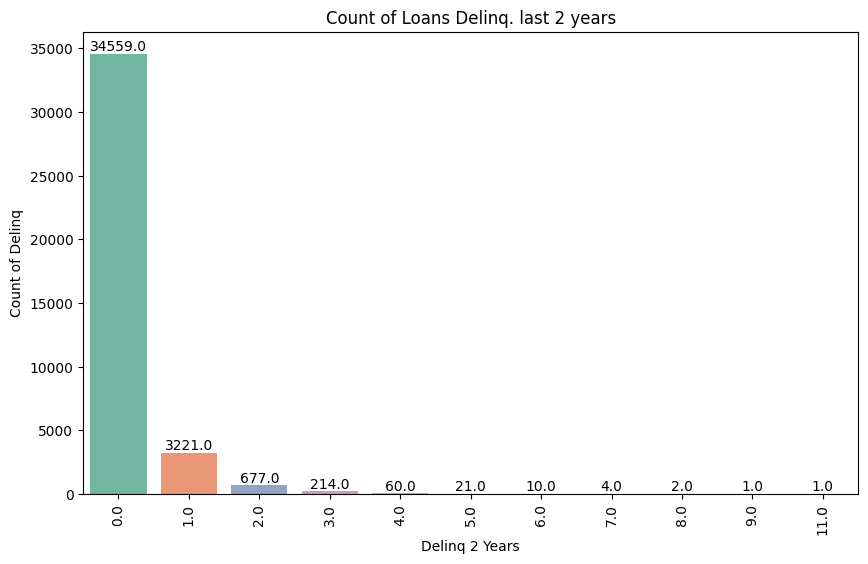

In [42]:
#Delinq Count plot
# Create a count plot for loan status by grade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='delinq_2yrs', data=lc_df, palette='Set2')  # You can choose any palette you like

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Count of Loans Delinq. last 2 years')
plt.xlabel('Delinq 2 Years')
plt.ylabel('Count of Delinq')
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.show()

In [43]:
#Delinq_2yrs average count


avg_borrowers_delinq_status =  lc_df[lc_df['delinq_2yrs']==0]['delinq_2yrs'].count()/len(lc_df)*100

print(avg_borrowers_delinq_status)

89.13850915656435


([0, 1, 2],
 [Text(0, 0, 'Verified'),
  Text(1, 0, 'Source Verified'),
  Text(2, 0, 'Not Verified')])

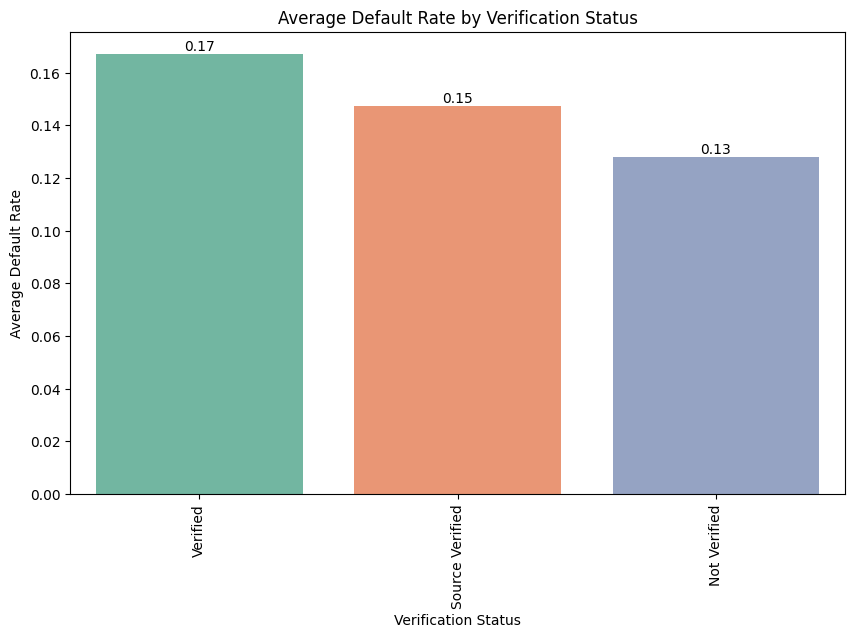

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='verification_status', y='loan_status', data=lc_df, palette='Set2', ci= None)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Add titles and labels
plt.title('Average Default Rate by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=90)

No direct correlation to verification status

Around 90% of the borrowers have zero Delinq. status last 2 years and their default rate is also close to average of 14%


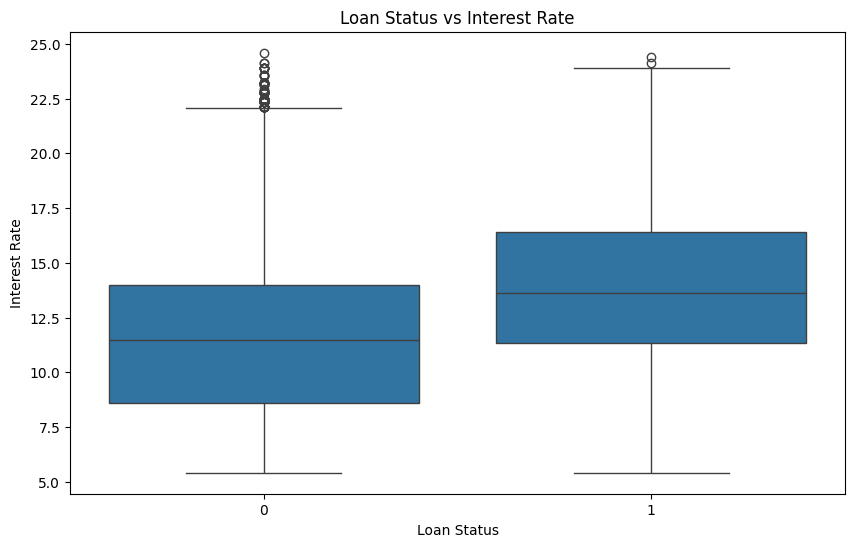

In [45]:
#Loan status vs loan interest rate
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='loan_status', y='int_rate', data=lc_df)
plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Surprisingly median interest rate for loan defaults are lower!

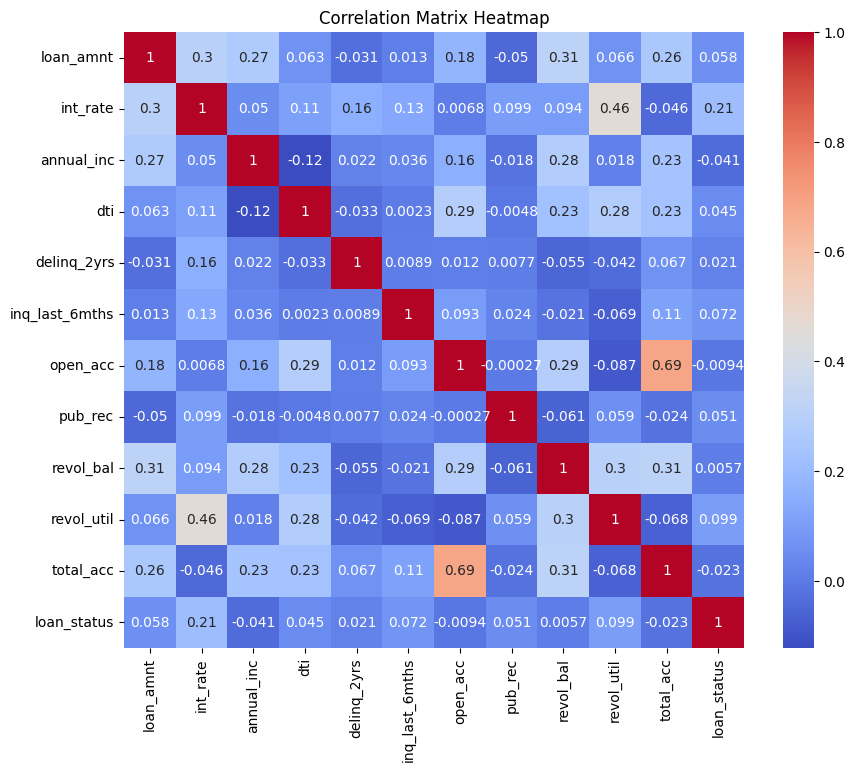

In [46]:
#Plot correlation matrix heatmap for all the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(lc_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

- Interest rates have a strong correleation with loan status
- Interest rates have strong correlation with high revol. utilization

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [47]:
# convert emp_length column to numeric
if lc_df['emp_length'].dtype == 'object':
  lc_df['emp_length'] = lc_df['emp_length'].str.replace(r'[a-zA-Z]', '', regex=True)
  lc_df['emp_length'] = lc_df['emp_length'].str.replace(' ','')
  lc_df['emp_length'] = lc_df['emp_length'].map({'<1': 0,'1': 1,'2': 2,'3': 3,
                                          '4': 4, '5': 5,'6': 6,'7': 7,
                                          '8': 8,'9': 9, '10+': 10})
print(lc_df['emp_length'].unique())

[10  0  3  8  9  4  5  1  6  2  7]


In [48]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  object 
 2   int_rate             38770 non-null  float64
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   emp_length           38770 non-null  int64  
 6   home_ownership       38770 non-null  object 
 7   annual_inc           38770 non-null  float64
 8   verification_status  38770 non-null  object 
 9   purpose              38770 non-null  object 
 10  dti                  38770 non-null  float64
 11  delinq_2yrs          38770 non-null  float64
 12  inq_last_6mths       38770 non-null  float64
 13  open_acc             38770 non-null  float64
 14  pub_rec              38770 non-null  float64
 15  revol_bal            38770 non-null 

In [49]:
# Convert grade, sub grade & term columns
lc_df['grade'] = lc_df['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
lc_df['sub_grade'] = lc_df['sub_grade'].map({'A1':0, 'A2':1, 'A3':2, 'A4':3, 'A5':4,
                                            'B1':5, 'B2':6, 'B3':7, 'B4':8, 'B5':9,
                                            'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
                                            'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
                                            'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
                                            'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
                                            'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34})
#lc_df['term'] = lc_df['term'].map({'36 months':36, '60 months':60})

In [50]:
#One hot encoding for home_ownership, verification_status, purpose
#check if columns exist
if 'home_ownership' in lc_df.columns and 'verification_status' in lc_df.columns and 'purpose' in lc_df.columns:
  one_hot_encoding_vars = ['home_ownership', 'verification_status', 'purpose']
  lc_df=pd.get_dummies(data=lc_df, columns=one_hot_encoding_vars, drop_first=True)

In [51]:
# Write code here
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38770 non-null  float64
 1   term                                 38770 non-null  object 
 2   int_rate                             38770 non-null  float64
 3   grade                                38770 non-null  int64  
 4   sub_grade                            38770 non-null  int64  
 5   emp_length                           38770 non-null  int64  
 6   annual_inc                           38770 non-null  float64
 7   dti                                  38770 non-null  float64
 8   delinq_2yrs                          38770 non-null  float64
 9   inq_last_6mths                       38770 non-null  float64
 10  open_acc                             38770 non-null  float64
 11  pub_rec                     

In [52]:
lc_df.shape

(38770, 35)

In [53]:
lc_df['loan_status'].value_counts()

,count
loan_status,
0,33136
1,5634


### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

# Model Building

- separate the datsset into features and target variable
- split data in to training data and test data
- Fit model and check the results


In [54]:
#Import the necessary libraries to split the data
from sklearn.model_selection import train_test_split

target = lc_df['loan_status']
features = lc_df.drop('loan_status', axis=1)

#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=60)


In [55]:
#Import library for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=60, max_iter=2000)

#Fit the model on the training data
logistic_model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = logistic_model.predict(X_test)

In [115]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

target_names = ['Fully Paid', 'Charged Off']
class_report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report: ")
print(class_report)


Accuracy on test data: 0.8352830188679246
Confusion Matrix: 
[[4789  589]
 [1157 4065]]
Classification Report: 
              precision    recall  f1-score   support

  Fully Paid       0.81      0.89      0.85      5378
 Charged Off       0.87      0.78      0.82      5222

    accuracy                           0.84     10600
   macro avg       0.84      0.83      0.83     10600
weighted avg       0.84      0.84      0.83     10600



#### Interpretation:

- The overall accuracy of 85% is high, but this is largely due to the model's strong performance on the majority class (Fully paid - `0`), which dominates the dataset. This suggests the model may be biased towards predicting the majority class.

- The recall for class `1` is 0.02 which is significantly lower than that for class `0`. This indicates that the model fails to identify a large portion of the minority class, leading to many class 1 false negatives.

- The F1-score for class `1` is much lower than for class `0`, reflecting the challenge in balancing precision and recall for the minority class in the presence of class imbalance.

- The macro average F1-score is lower than the weighted average, highlighting that the model's performance is skewed towards the majority class, and it struggles with the minority class due to the imbalance.

These interpretations suggest that the model's strong performance is misleading due to class imbalance, and handling this imbalance (e.g., using SMOTE, class weighting, etc.) is required

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=60)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




In [58]:
X_train_smote.shape

(52998, 34)

In [59]:
#check the distribution of class in the new sample data
from collections import Counter
Counter(y_train_smote)

Counter({1: 26499, 0: 26499})

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split.


In [60]:
#Split the data b/n training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=60)

In [61]:
print(y_train.value_counts())
print(y_test.value_counts())

loan_status
1    21277
0    21121
Name: count, dtype: int64
loan_status
0    5378
1    5222
Name: count, dtype: int64


# Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
#Initialize the Logistic Regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=60, max_iter=200)

#Fit the model on the training data
logistic_model.fit(X_train, y_train)

#Predict on the test data
y_pred = logistic_model.predict(X_test)

In [64]:
## Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(class_report)

Accuracy: 0.8352830188679246
Confusion Matrix: 
[[4789  589]
 [1157 4065]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5378
           1       0.87      0.78      0.82      5222

    accuracy                           0.84     10600
   macro avg       0.84      0.83      0.83     10600
weighted avg       0.84      0.84      0.83     10600



#### Interpretation:

- After applying SMOTE, the recall, f1-score for class `1` (the minority class) increased, indicating that the model is now better at identifying loan default which is a minority class

- The overall accuracy stayed the same even after applying SMOTE

- The performance for the majority class (`0`) remains strong, with a slight decrease in precision and recall, which is a common trade-off when handling class imbalance using techniques like SMOTE.

- Overall, this model has a decvent prediction rate across accuracy, precision, recall and F1-score! All around upper 80%

- This model has a high precision (around 87%) for class 1 which is the important metric for loan defaults!

In [65]:
# Get the coefficients of the model
coefficients = logistic_model.coef_
# Get the feature names (assuming X_train is a DataFrame)
feature_names = features.columns

# Create a DataFrame to easily view feature names and coefficients
coef_df = pd.DataFrame(coefficients[0], index=feature_names, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

print(coef_df)


                                     Coefficient
sub_grade                               6.392784
int_rate                                5.222546
purpose_small_business                  5.168379
purpose_debt_consolidation              4.835346
purpose_other                           4.677436
purpose_vacation                        4.479752
purpose_educational                     4.464718
purpose_medical                         4.447851
purpose_home_improvement                4.408611
purpose_moving                          4.155055
purpose_renewable_energy                4.124712
purpose_house                           4.108916
purpose_credit_card                     4.025130
purpose_major_purchase                  3.955711
purpose_wedding                         3.894574
pub_rec                                 1.840874
inq_last_6mths                          1.372801
home_ownership_OTHER                    1.169490
home_ownership_OWN                      0.872011
verification_status_

# Observation
- From the coefficient summary, we see that `int_rate`, `grade`, `sub_grade`, `small business` have strong effect on the overall loan status, something which we also saw from the EDA part

# Now let's build decision tress and see how the model changes!

In [68]:
#Import the decision tree libraries
from sklearn.tree import DecisionTreeClassifier

#Inititalize and train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=60)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances_dt = dt_model.feature_importances_
feature_names = features.columns

# Display the feature importances
import pandas as pd
importance_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})
importance_df_dt = importance_df_dt.sort_values(by='Importance', ascending=False)
print(importance_df_dt)

                                Feature  Importance
9                        inq_last_6mths    0.299204
1                                  term    0.229112
6                            annual_inc    0.050602
2                              int_rate    0.047359
12                            revol_bal    0.043825
7                                   dti    0.038705
0                             loan_amnt    0.038428
13                           revol_util    0.038275
14                            total_acc    0.029292
10                             open_acc    0.024777
5                            emp_length    0.021078
4                             sub_grade    0.018010
22           purpose_debt_consolidation    0.016329
19  verification_status_Source Verified    0.011336
11                              pub_rec    0.011114
31               purpose_small_business    0.010863
21                  purpose_credit_card    0.009516
3                                 grade    0.009319
20         v

In [69]:
#Predict on the train data set
y_pred_dt_train = dt_model.predict(X_train)

# Calculate accuracy
accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
print('Training Accuracy:', accuracy_dt)

Training Accuracy: 1.0


In [70]:
from sklearn.metrics import classification_report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_train, y_pred_dt_train, target_names = target_names))

              precision    recall  f1-score   support

  Fully Paid       1.00      1.00      1.00     21121
 Charged Off       1.00      1.00      1.00     21277

    accuracy                           1.00     42398
   macro avg       1.00      1.00      1.00     42398
weighted avg       1.00      1.00      1.00     42398



In [71]:
#Predict on the test data set
y_pred_dt_test = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print('Training Accuracy on test data:', accuracy_dt_test)

Training Accuracy on test data: 0.8474528301886792


In [72]:
from sklearn.metrics import classification_report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, y_pred_dt_test, target_names = target_names))

              precision    recall  f1-score   support

  Fully Paid       0.86      0.84      0.85      5378
 Charged Off       0.84      0.86      0.85      5222

    accuracy                           0.85     10600
   macro avg       0.85      0.85      0.85     10600
weighted avg       0.85      0.85      0.85     10600



# Observation
- The model is overfitting on the training data set with accuracy, precision, recall, f1-scores are all 1.0
- model is almost behaving the same like logistic regression on the test data
- Next step is to try hyperparameter tunring to improve the model on the test data

In [73]:
#Perform cross-validation to get the best possible features
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],      # Criterion to split nodes
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],        # Minimum number of samples required at a leaf node
    'max_features': [None, 'auto', 'sqrt'] # Number of features to consider when looking for the best split
}

In [74]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit it to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=60), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [114]:
# Get the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate on the train set
score = grid_search.score(X_train, y_train)
print("Train Accuracy: ", score)

#Get classification report on grid search
score = grid_search.predict(X_train)
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_train, score, target_names = target_names))

# Evaluate on the test set
score_test = grid_search.score(X_test, y_test)
print("Test Accuracy: ", score_test)

#Get classification report on grid search
score_test_pred = grid_search.predict(X_test)
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, score_test_pred, target_names = target_names))


Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Train Accuracy:  0.8732487381480258
              precision    recall  f1-score   support

  Fully Paid       0.81      0.97      0.88     21121
 Charged Off       0.97      0.77      0.86     21277

    accuracy                           0.87     42398
   macro avg       0.89      0.87      0.87     42398
weighted avg       0.89      0.87      0.87     42398

Test Accuracy:  0.8635849056603774
              precision    recall  f1-score   support

  Fully Paid       0.81      0.96      0.88      5378
 Charged Off       0.95      0.76      0.85      5222

    accuracy                           0.86     10600
   macro avg       0.88      0.86      0.86     10600
weighted avg       0.88      0.86      0.86     10600



# Observation
- Our goal is to decrease the number of loan defaults, making precision an important metric. We aim to minimize Type 1 Errors by avoiding false positives, meaning we should ensure that individuals who are likely to default do not receive a loan.
- On the other hand, a low recall score (indicating Type 2 Errors) suggests false negatives, where potential business opportunities might be missed. This occurs when the model incorrectly classifies a reliable borrower as a default risk, resulting in loan denial and lost opportunities.

Let's try PCA + DecisionTree classifier

In [79]:
# Import the required module
from sklearn.decomposition import PCA


# Applying PCA
pca = PCA(n_components=20)  # Starting with 2 components to visualize
principal_components = pca.fit_transform(X_train)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a list of (Principal Component, Variability) tuples and sort them in descending order
components_variability = [(f'PC{i+1}', var) for i, var in enumerate(explained_variance)]
components_variability.sort(key=lambda x: x[1], reverse=True)

# Print the variability captured by each component
for component, variability in components_variability:
    print(f'{component}: {variability:.4f}')

PC1: 0.1617
PC2: 0.1356
PC3: 0.1036
PC4: 0.1001
PC5: 0.0633
PC6: 0.0567
PC7: 0.0506
PC8: 0.0458
PC9: 0.0403
PC10: 0.0381
PC11: 0.0367
PC12: 0.0291
PC13: 0.0209
PC14: 0.0185
PC15: 0.0157
PC16: 0.0129
PC17: 0.0115
PC18: 0.0101
PC19: 0.0079
PC20: 0.0072


# Observation
- PCA is not helping for this dataset as the features are not highly complex and not suffering from high multi collinearity

# Let's try Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the random forest classifier
rf_model = RandomForestClassifier(random_state=60, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Display the feature importances
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
print(importance_df_rf)

                                Feature  Importance
9                        inq_last_6mths    0.120835
1                                  term    0.116903
2                              int_rate    0.080272
6                            annual_inc    0.054953
13                           revol_util    0.050909
12                            revol_bal    0.048855
4                             sub_grade    0.048267
0                             loan_amnt    0.047438
7                                   dti    0.046568
10                             open_acc    0.041573
14                            total_acc    0.041312
5                            emp_length    0.034214
22           purpose_debt_consolidation    0.028771
18                  home_ownership_RENT    0.024470
3                                 grade    0.024458
20         verification_status_Verified    0.024241
31               purpose_small_business    0.023929
8                           delinq_2yrs    0.023203
19  verifica

In [81]:
# Predict using the random forest model
y_pred_rf_train = rf_model.predict(X_train)

# Calculate accuracy
accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
print('Random Forest Training Accuracy:', accuracy_rf)

Random Forest Training Accuracy: 1.0


In [82]:
# Predict using the random forest model
y_pred_rf_test = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
print('Random Forest Test Accuracy:', accuracy_rf)

Random Forest Test Accuracy: 0.9088679245283019


Random Forst is also overfitting on the training dataset, but it showed good performance so far (90%) on the test data set as well!

In [89]:
# Define the hyperparameters
n_estimators = [5,20,50,100] # Number of trees in the forest
max_features = ['auto', 'sqrt'] # Number of features to consider at each split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # Maximum depth of each tree
min_samples_split = [2, 6, 10] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 3, 4] # Minimum number of samples required to be at a leaf node
bootstrap = [True, False] # Method for sampling data points (True for bootstrap sampling, False otherwise)

In [90]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': n_estimators,           # Number of trees in the forest
    'max_features': max_features,           # Number of features to consider at each split
    'max_depth': max_depth,                 # Maximum depth of each tree
    'min_samples_split': min_samples_split, # Minimum number of samples required to split an internal node
    'min_samples_leaf': min_samples_leaf,   # Minimum number of samples required to be at a leaf node
    'bootstrap': bootstrap                  # Method for sampling data points (True for bootstrap sampling, False otherwise)
}

In [101]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest model
rf_rsearch_model = RandomForestClassifier()

# Set up the RandomizedSearchCV with the Random Forest model and hyperparameter grid
rf_rsearch_random = RandomizedSearchCV(
    estimator = rf_rsearch_model,         # The model to tune (Random Forest in this case)
    param_distributions = param_grid,     # The hyperparameter grid to sample from
    n_iter = 10,                          # Number of different combinations to try (iterations)
    cv = 5,                                # Number of folds for cross-validation
    verbose = 2,                           # Controls the verbosity: higher numbers give more details
    random_state = 35,                     # Ensures reproducibility by setting a random seed
    n_jobs = -1                            # Utilizes all available processors for parallel computation
)

In [102]:
# Perform the hyperparameter search on the training data
rf_rsearch_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [109]:
# Get the best parameters
print("Best Parameters: ", rf_rsearch_random.best_params_)

#Get classification report on test data
y_test_pred = rf_rsearch_random.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy:.2f}')

# Print a detailed classification report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, y_test_pred, target_names = target_names))


Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
Accuracy on test data: 0.90
              precision    recall  f1-score   support

  Fully Paid       0.86      0.97      0.91      5378
 Charged Off       0.97      0.84      0.90      5222

    accuracy                           0.90     10600
   macro avg       0.91      0.90      0.90     10600
weighted avg       0.91      0.90      0.90     10600



## Summary

- RandomForest model gave the best reults so far! Accuracy of 90% on test data. Precision, recall, f1-score on fully paid and loan Default results are below.

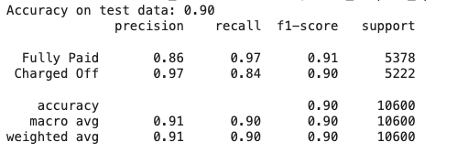

- Decision Trees with Hyperparameters also gave an accuracy of 86% and decent precession, recall and f1-scores on Fully paid loan but recall on defaults are below 80%.

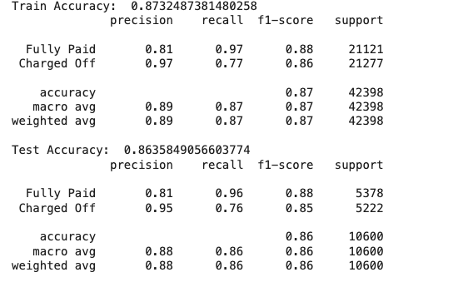

- Logistic Regression also gave an accuracy of 83% and is very much comparable to decision trees.

- 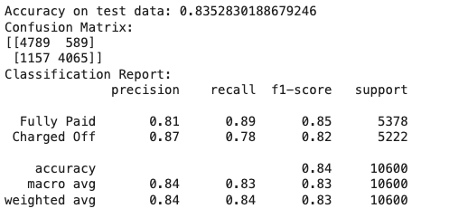